# Pré-Processamento

## Carregando Tratamento de Dados

In [1]:
%run 1.0-scr-tratamento-de-dados.ipynb

In [2]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/lonalt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Formatar base

In [3]:
df.head(30)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [4]:
#Padronizar
def replace_patterns(sentence):
    patterns = [
        (r'\bper share\b', 'per-share'),
        (r'\bpct\b|\bper-cent\b', 'percent'),
        (r'\bmn\b|\bmln\b', 'million')
    ]
    # Aplica cada padrão de substituição
    for pattern, replacement in patterns:
        sentence = re.sub(pattern, replacement, sentence)

    return sentence

df['Sentence'] = df['Sentence'].apply(replace_patterns)

df.head(30)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [5]:
#Remover Hiperlink
def remover_hiperlinks(texto):
    return re.sub(r'http\S+', '', texto)

df['Sentence'] = df['Sentence'].apply(remover_hiperlinks)

df.head(30)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [6]:
#Remover Pontuação
def remover_pontuacao(texto):
    return re.sub(r'[^\w\s]', '', texto)

df['Sentence'] = df['Sentence'].apply(remover_pontuacao)

df.head(30)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,ESI on lows down 150 to 250 BK a real possibility,negative
2,For the last quarter of 2010 Componenta s net...,positive
3,According to the FinnishRussian Chamber of Com...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,SPY wouldnt be surprised to see a green close,positive
6,Shells 70 Billion BG Deal Meets Shareholder Sk...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone s net sales rose by some 14 yearonyear i...,positive
9,The Stockmann department store will have a tot...,neutral


In [7]:
#Formatacao
df['Sentence'] = df['Sentence'].str.lower()

df.head(30)

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
5,spy wouldnt be surprised to see a green close,positive
6,shells 70 billion bg deal meets shareholder sk...,negative
7,ssh communications security corp stock exchang...,negative
8,kone s net sales rose by some 14 yearonyear i...,positive
9,the stockmann department store will have a tot...,neutral


In [8]:
# Remover números
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

df['Sentence'] = df['Sentence'].apply(remover_numeros)

df.head(30)

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
5,spy wouldnt be surprised to see a green close,positive
6,shells billion bg deal meets shareholder skep...,negative
7,ssh communications security corp stock exchang...,negative
8,kone s net sales rose by some yearonyear in ...,positive
9,the stockmann department store will have a tot...,neutral


In [9]:
# Remove letras soltas
def remover_letras_soltas(texto):
    return re.sub(r'\b[a-zA-Z]\b', '', texto)

df['Sentence'] = df['Sentence'].apply(remover_letras_soltas)

df.head(30)

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk real possibility,negative
2,for the last quarter of componenta net sale...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
5,spy wouldnt be surprised to see green close,positive
6,shells billion bg deal meets shareholder skep...,negative
7,ssh communications security corp stock exchang...,negative
8,kone net sales rose by some yearonyear in t...,positive
9,the stockmann department store will have tota...,neutral


In [10]:
#Tokenizar frases
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

df['Sentence'] = df['Sentence'].apply(tokenize_sentence)

df.head(30)

,Sentence,Sentiment
0,"[the, geosolutions, technology, will, leverage...",positive
1,"[esi, on, lows, down, to, bk, real, possibility]",negative
2,"[for, the, last, quarter, of, componenta, net,...",positive
3,"[according, to, the, finnishrussian, chamber, ...",neutral
4,"[the, swedish, buyout, firm, has, sold, its, r...",neutral
5,"[spy, wouldnt, be, surprised, to, see, green, ...",positive
6,"[shells, billion, bg, deal, meets, shareholder...",negative
7,"[ssh, communications, security, corp, stock, e...",negative
8,"[kone, net, sales, rose, by, some, yearonyear,...",positive
9,"[the, stockmann, department, store, will, have...",neutral


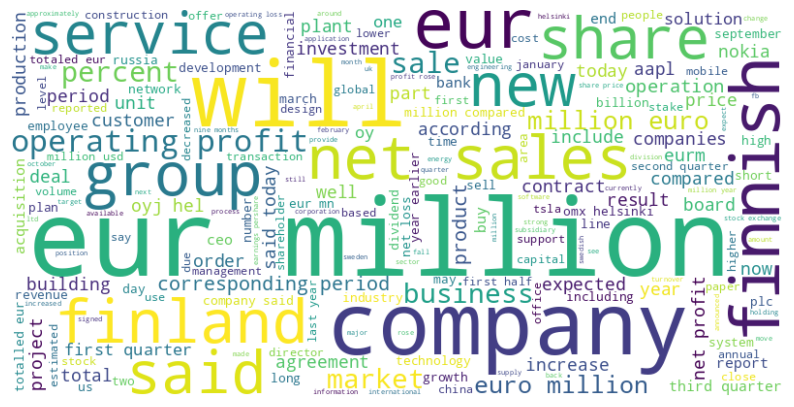

In [11]:
# Juntar todas as frases tokenizadas em uma lista de strings
all_sentences = [' '.join(tokens) for tokens in df['Sentence']]

# Juntar as frases para criar uma string única
all_text = ' '.join(all_sentences)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(all_text)

# Exibir a imagem da nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()